# Gráficos para series temporales en Matplotlib

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time

df = pd.read_csv('base_datos_2008.csv')
df2 = df[df['Origin'].isin(['ATL','HOU','IND'])] # Crear un subset, los vuelos que tienen origen en estos 3 aeropuertos
df = df.head(500000) # Subset de un mediomillon de caasos del df original

### Código de preprocesamiento de datos

In [13]:
times = [] # Crear una lista vacía
for i in np.arange(len(df)): # Iterar por los index de nuestro df
    times.append(datetime.datetime(year = 2008, month = df.loc[i,'Month'], day = df.loc[i,'DayofMonth']))
# year se fija porque solo tenemos datos del 2008 
# # month, escoge todos los casos de la fila i

In [14]:
times[5000] # Muestra el año, el mes, día, hora, minuto

datetime.datetime(2008, 1, 4, 0, 0)

In [15]:
# Añadir una nueva columna al dataframe
df['Time'] = times

In [17]:
# Agrupar para cada uno de los días
data = df.groupby(by = ['Time'],as_index=False)["DepDelay","ArrDelay"].mean() # groupby trabajando por columna, muestra la media de los retrasos que ofrece la base de datos
data.head()

,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

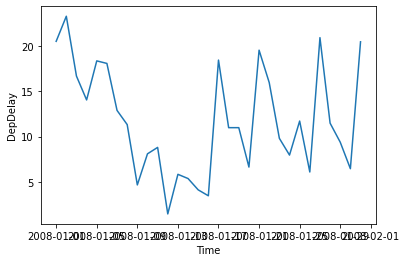

In [18]:
# Realizar gráfica
sns.lineplot(data['Time'],data['DepDelay'])

In [19]:
# Agrupar sin forzar el index a noser columna
data = df.groupby(by = ['Time'])['DepDelay','ArrDelay'].mean()
data.head()

,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

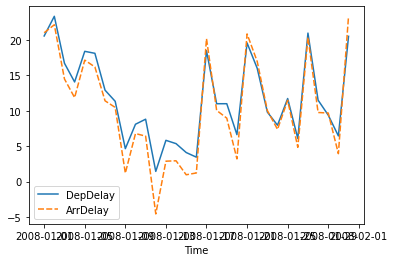

In [20]:
sns.lineplot(data = data) # Se obtiene datos diferentes
# Se obtiene una serie donde podemos mostrar en el interior mas de una serie temporal

In [25]:
# Generar el mismo tipo de coluimnas pero esta vez para el segundo df que solo tenia 3 aeropuertos
times = []
for i in df2.index:
    times.append(datetime.datetime(year = 2008, month = df2.loc[i,'Month'], day = df2.loc[i,'DayofMonth']))

df2['Time'] = times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

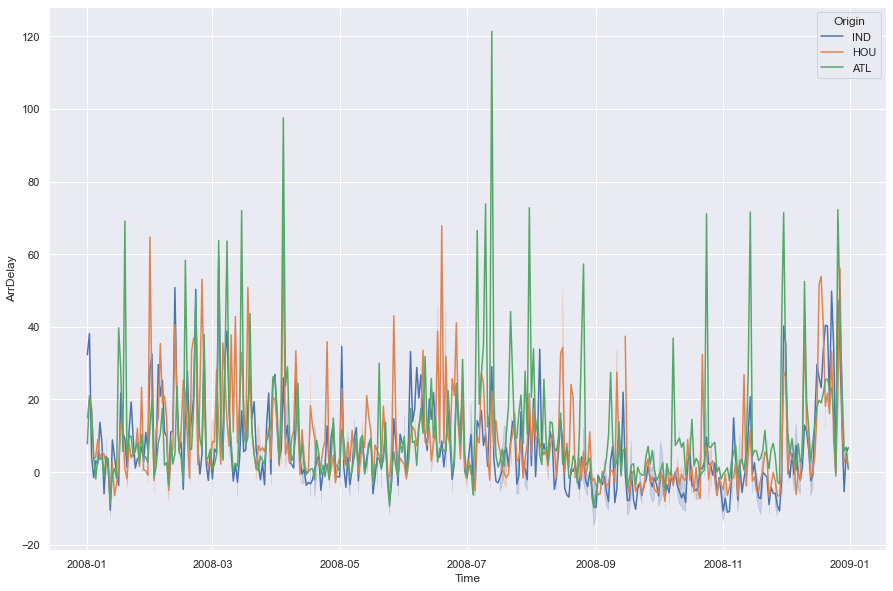

In [26]:
sns.set(rc={'figure.figsize':(15,10)}) # Ajustar los margenes de los graficos
sns.lineplot(x='Time', y='ArrDelay', hue='Origin',data=df2) # hue permite filtrar mas de una serie a la vez con un dato categorico